In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST
import graphviz, wavedrom
from IPython.display import display, Markdown

In [2]:
# snail with an Mealy FSM brain
initStateMealy = 'S0'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunctionMealy = [ ['S0',0,'S1'], ['S0',1,'S0'], ['S1',0,'S1'], ['S1',1,'S0'] ]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ ['S0',0,0], ['S0',1,0], ['S1',0,0], ['S1',1,1]]
# short form
# brainMealy = SciPyFST([], initStateMealy, [], [], transitionFunctionMealy, outputFunctionMealy)
brainMealy = SciPyFST(initState='S0',
    transitionFunction=[['S0',0,'S1'],['S0',1,'S0'],['S1',0,'S1'],['S1',1,'S0']],
    outputFunction=[['S0',0,0],['S0',1,0],['S1',0,0],['S1',1,1]])
# debug
print(brainMealy.comboStateAndOutDict)

{('S0', 0): ['S1', 0], ('S0', 1): ['S0', 0], ('S1', 0): ['S1', 0], ('S1', 1): ['S0', 1]}


| Input \ State | S0 | S1 |
|:---:|:---:|:---:|
| 0 | S1/0 | S1/0 |
| 1 | S0/0 | S0/1 |


| Input \ State | S0 | S1 |
|:---:|:---:|:---:|
| 0 | S1/0 | S1/0 |
| 1 | S0/0 | S0/1 |



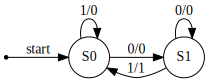

'../util/img\\brainMealy.svg'

In [3]:
# Visualise FST
display(Markdown(brainMealy.toMdTable()))
print(brainMealy.toMdTable())
src = graphviz.Source(brainMealy.toDot())
display(src)
src.render('../util/img/brainMealy', format='svg')

| Input \ State | 0/- | 1/0 | 2/0 | 3/1 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 | 1 |
| 1 | 2 | 3 | 2 | 2 |


| Input \ State | 0/- | 1/0 | 2/0 | 3/1 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 | 1 |
| 1 | 2 | 3 | 2 | 2 |



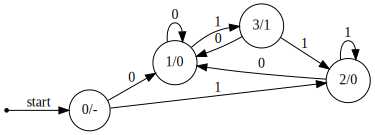

'../util/img\\brainMoore.svg'

In [4]:
# Convert Mealy to Moore
brainMoore = brainMealy.asMoore()
display(Markdown(brainMoore.toMdTable()))
print(brainMoore.toMdTable())
src = graphviz.Source(brainMoore.toDot())
display(src)
src.render('../util/img/brainMoore', format='svg')

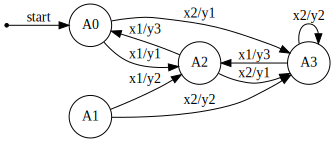

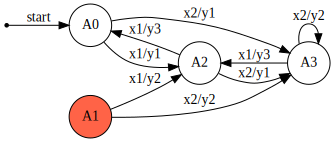

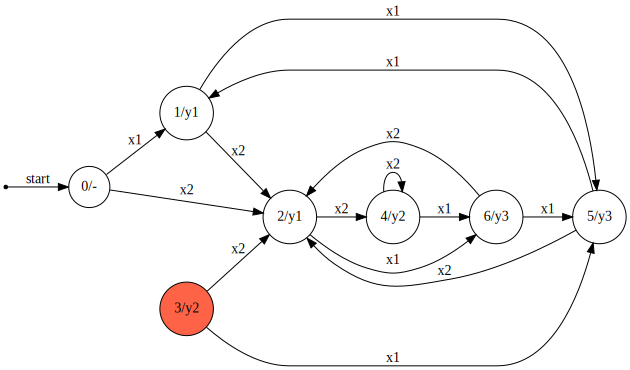

'../util/img\\fstWithUnreachableStates_3.svg'

In [5]:
# FST with unreachoble states
states_03 = ['A0','A1','A2','A3']
initState_03 = 'A0'
inAlphabet_03 = ['x1','x2']
outAlphabet_03 = ['y1','y2','y3','y4','y5']
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction_03 = [ \
    ['A0','x1','A2'], ['A0','x2','A3'], \
    ['A1','x1','A2'], ['A1','x2','A3'], \
    ['A2','x1','A0'], ['A2','x2','A3'], \
    ['A3','x1','A2'], ['A3','x2','A3'], \
]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunction_03 = [ \
    ['A0','x1','y1'], ['A0','x2','y1'], \
    ['A1','x1','y2'], ['A1','x2','y2'], \
    ['A2','x1','y3'], ['A2','x2','y1'], \
    ['A3','x1','y3'], ['A3','x2','y2'] \
]
fstWithUnreachableStates = SciPyFST(states_03, initState_03, inAlphabet_03,
    outAlphabet_03, transitionFunction_03, outputFunction_03)
display(graphviz.Source(fstWithUnreachableStates.toDot()))
graphviz.Source(fstWithUnreachableStates.toDot()).render('../util/img/fstWithUnreachableStates_1', format='svg')
display(graphviz.Source(fstWithUnreachableStates.toDot(colorOfUnreachableStates='tomato')))
graphviz.Source(fstWithUnreachableStates.toDot(colorOfUnreachableStates='tomato')).render('../util/img/fstWithUnreachableStates_2', format='svg')
display(graphviz.Source(fstWithUnreachableStates.asMoore().toDot(colorOfUnreachableStates='tomato')))
graphviz.Source(fstWithUnreachableStates.asMoore().toDot(colorOfUnreachableStates='tomato')).render('../util/img/fstWithUnreachableStates_3', format='svg')

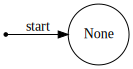

In [6]:
emptyFST = SciPyFST()
display(graphviz.Source(emptyFST.toDot()))

colorOfUnreachableStates='tomato'


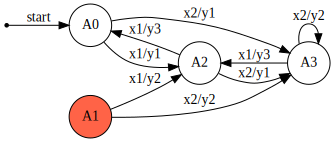

highlightStates=['A_42','A0','A2']


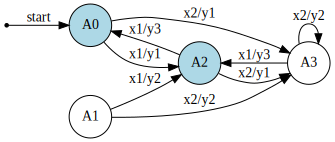

highlightPath=['x2','x2','x1']


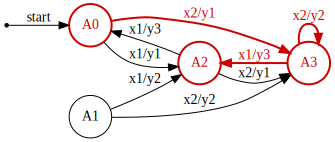

In [7]:
print('colorOfUnreachableStates=\'tomato\'')
display(graphviz.Source(fstWithUnreachableStates.toDot(colorOfUnreachableStates='tomato')))
print('highlightStates=[\'A_42\',\'A0\',\'A2\']')
display(graphviz.Source(fstWithUnreachableStates.toDot(highlightStates=['A_42','A0','A2'], highlightStatesColor='lightblue')))
print('highlightPath=[\'x2\',\'x2\',\'x1\']')
display(graphviz.Source(fstWithUnreachableStates.toDot(highlightPath=['x2','x2','x1'])))